In [1]:
import coaddition
import chto_coadd
import sextractor
%load_ext autoreload
%autoreload 2
import pyfits
import numpy as np
from matplotlib import pyplot as plt
import complete_process as cp
from read_fits_list import read_fits_list
from matplotlib.colors import LogNorm
import glob
import os
import scipy.stats as st
%matplotlib inline


No graphics display available for this session.
Graphics tasks that attempt to plot to an interactive screen will fail.



In [2]:
datadir='/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/G2_final0522/05_22_g2_final/'
M3_R_list = glob.glob(datadir + '*M82*R*')
M3_G_list = glob.glob(datadir + '*M82*G*')
M3_B_list = glob.glob(datadir + '*M82*B*')


# Images are

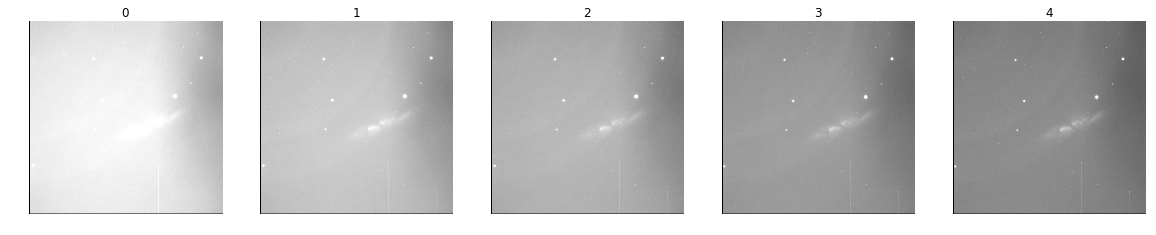

In [3]:
plt.figure(figsize=(20,5))
for i,f in enumerate(M3_B_list):
    temp=pyfits.open(f)
    data = temp[0].data
    plt.subplot(1,5,i+1)
    plt.imshow(data, origin="lowerleft",norm=LogNorm(), cmap="gray")
    plt.axis('off')
    plt.clim(3900,6000)
    plt.title(i)

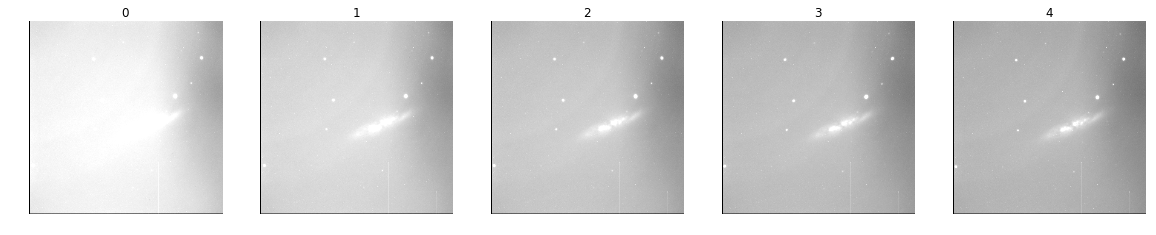

In [4]:
plt.figure(figsize=(20,5))
for i,f in enumerate(M3_G_list):
    temp=pyfits.open(f)
    data = temp[0].data
    plt.subplot(1,5,i+1)
    plt.imshow(data, origin="lowerleft",norm=LogNorm(), cmap="gray")
    plt.axis('off')
    plt.clim(3900,6000)
    plt.title(i)

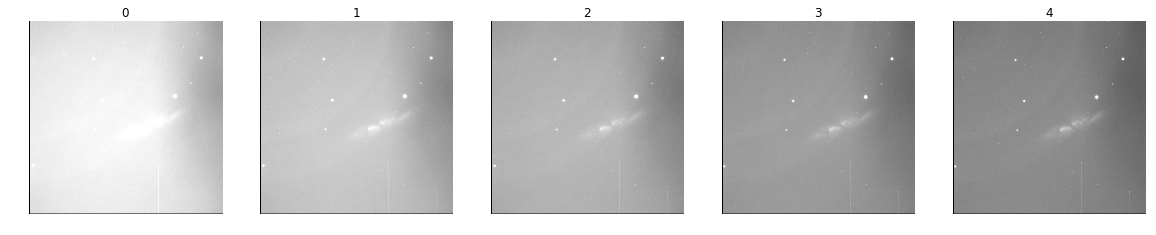

In [5]:
plt.figure(figsize=(20,5))
for i,f in enumerate(M3_B_list):
    temp=pyfits.open(f)
    data = temp[0].data
    plt.subplot(1,5,i+1)
    plt.imshow(data, origin="lowerleft",norm=LogNorm(), cmap="gray")
    plt.axis('off')
    plt.clim(3900,6000)
    plt.title(i)

# bias

In [4]:
biasfilelist=glob.glob(datadir + '*bias*')
len(biasfilelist)

10

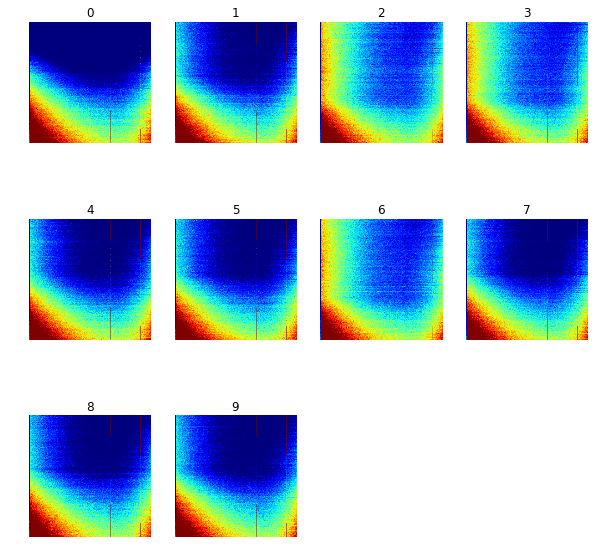

In [20]:
plt.figure(figsize=(10,10))
for i,f in enumerate(biasfilelist):
    temp=pyfits.open(f)
    data = temp[0].data
    plt.subplot(3,4,i+1)
    plt.imshow(data, origin="lowerleft")
    plt.axis('off')
    plt.clim(4000,4100)
    plt.title(i)

In [5]:
masterbias = cp.AverageBias(biasfilelist)

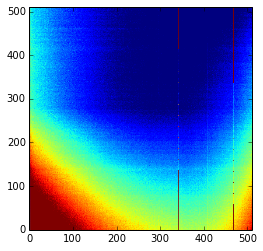

In [22]:
plt.imshow(masterbias, origin='lowerleft')
plt.clim(4000,4100)
plt.show()

# Dark

In [8]:
darkfilelist = glob.glob(datadir+'*dark*')

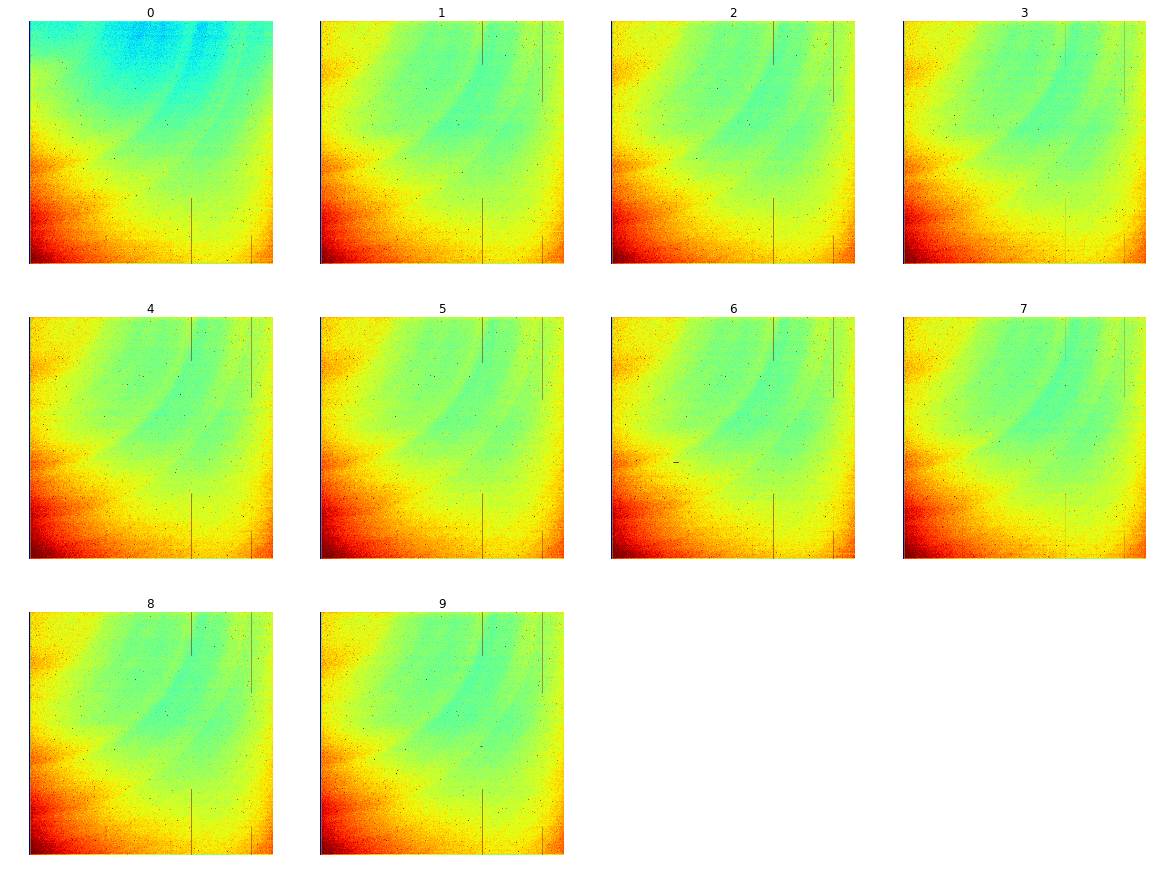

In [24]:
plt.figure(figsize=(20,15))
for i,f in enumerate(darkfilelist):
    temp=pyfits.open(f)
    data = temp[0].data
    plt.subplot(3,4,i+1)
    plt.imshow(data, origin="lowerleft", cmap="jet")
    plt.axis('off')
    plt.clim(3900,4200)
    plt.title(i)

In [9]:
darkfilelist.pop(0)

'/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/G2_final0522/05_22_g2_final/dark-001D.fit'

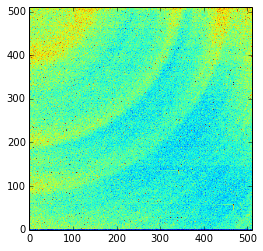

In [10]:
masterdark = cp.AverageDark(darkfilelist, masterbias)
plt.imshow(masterdark, origin='lowerleft')
plt.clim(0,6)

# Flats

In [11]:
flatfilelist_R = glob.glob(datadir + '*flat*R*')
flatfilelist_G = glob.glob(datadir + '*flat*G*')
flatfilelist_B = glob.glob(datadir + '*flat*B*')

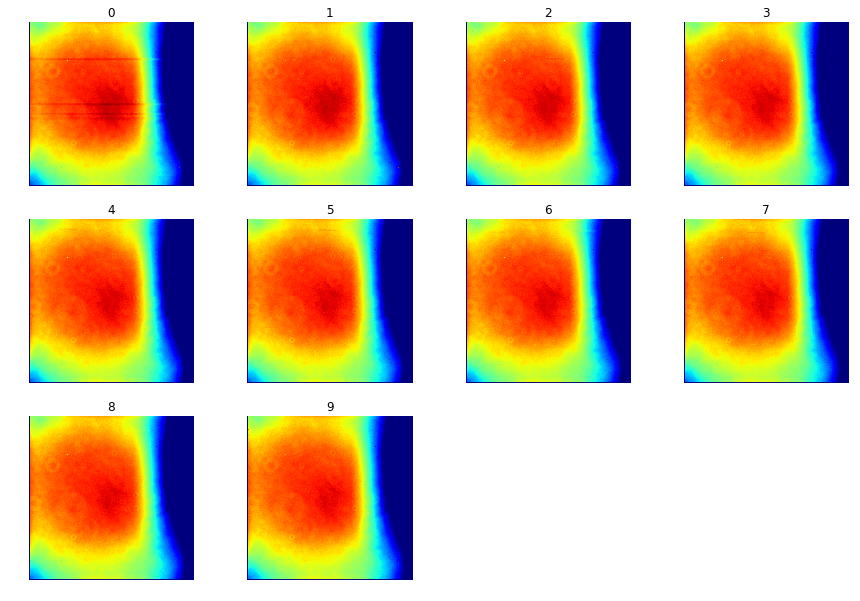

In [15]:
plt.figure(figsize=(15,10))
for i,f in enumerate(flatfilelist_R):
    temp=pyfits.open(f)
    data = temp[0].data
    med = np.nanmedian(data)
    plt.subplot(3,4,i+1)
    plt.imshow(data, origin="lowerleft", cmap="jet")
    plt.axis('off')
    plt.clim(0.8*med, 1.1*med)
    plt.title(i)

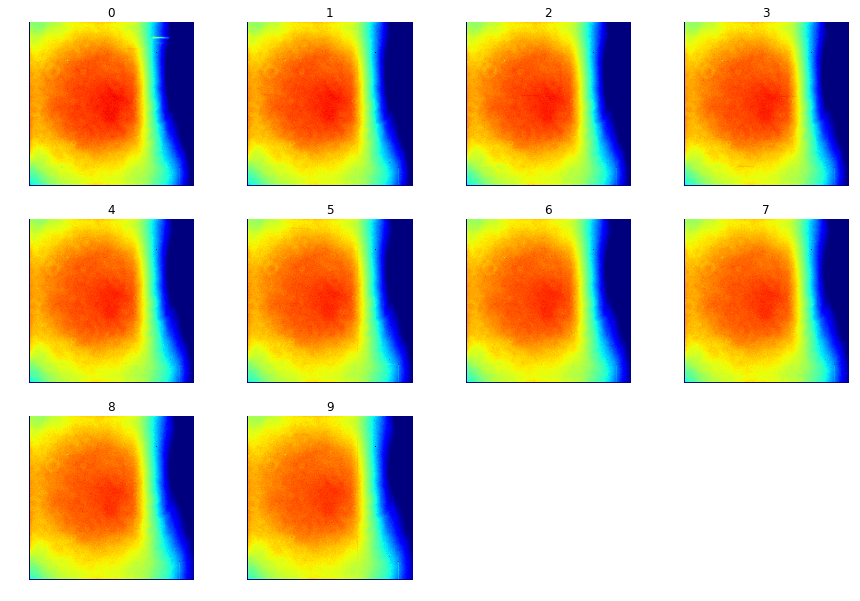

In [16]:
plt.figure(figsize=(15,10))
for i,f in enumerate(flatfilelist_G):
    temp=pyfits.open(f)
    data = temp[0].data
    med = np.nanmedian(data)
    plt.subplot(3,4,i+1)
    plt.imshow(data, origin="lowerleft", cmap="jet")
    plt.axis('off')
    plt.clim(0.8*med, 1.1*med)
    plt.title(i)

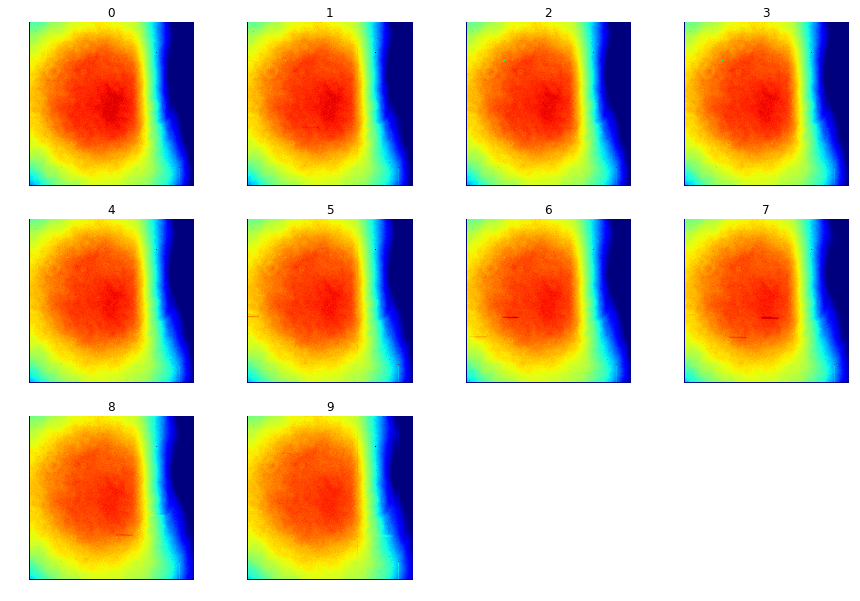

In [17]:
plt.figure(figsize=(15,10))
for i,f in enumerate(flatfilelist_B):
    temp=pyfits.open(f)
    data = temp[0].data
    med = np.nanmedian(data)
    plt.subplot(3,4,i+1)
    plt.imshow(data, origin="lowerleft", cmap="jet")
    plt.axis('off')
    plt.clim(0.8*med, 1.1*med)
    plt.title(i)

In [12]:
finalflat_R = cp.AverageFlat(flatfilelist_R,masterbias, masterdark)
finalflat_G = cp.AverageFlat(flatfilelist_G,masterbias, masterdark)
finalflat_B = cp.AverageFlat(flatfilelist_B,masterbias, masterdark)

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


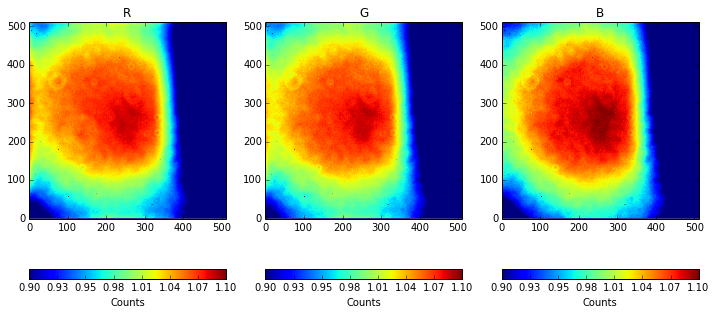

In [13]:
fig=plt.figure(figsize=(12,6))
vmin=0.9
vmax=1.1
v1 = np.logspace(np.log10(vmin),np.log10(vmax), 8, endpoint=True)
plt.subplot(131)
plt.title("R")
plt.imshow(finalflat_R, origin='lower',norm=LogNorm(), vmin=vmin, vmax=vmax)
cb = plt.colorbar(orientation='horizontal',ticks=v1)
cb.ax.set_xticklabels(["{:4.2f}".format(i) for i in v1])
cb.set_label('Counts')
plt.subplot(132)
plt.title("G")
plt.imshow(finalflat_G, origin='lower',norm=LogNorm(),vmin=vmin,vmax=vmax)
cb = plt.colorbar(orientation='horizontal',ticks=v1)
cb.ax.set_xticklabels(["{:4.2f}".format(i) for i in v1])
cb.set_label('Counts')
plt.subplot(133)
plt.title("B")
im=plt.imshow(finalflat_B, origin='lower',norm=LogNorm(),vmin=vmin,vmax=vmax)
cb = plt.colorbar(orientation='horizontal',ticks=v1)
cb.ax.set_xticklabels(["{:4.2f}".format(i) for i in v1])
cb.set_label('Counts')

# Process the images

In [50]:
baseName="M3"
datadir='/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/'

In [51]:
newbias = datadir+'Cali/'+baseName+'_Master_Bias.fits'
newdark = datadir+'Cali/'+baseName+'_Master_Dark.fits'
newflat_R = datadir+'Cali/'+baseName+'_Master_Flat_R.fits'
newflat_G = datadir+'Cali/'+baseName+'_Master_Flat_G.fits'
newflat_B = datadir+'Cali/'+baseName+'_Master_Flat_B.fits'

biashdu = pyfits.PrimaryHDU(masterbias)
biashdu.writeto(newbias, clobber=True)

darkhdu = pyfits.PrimaryHDU(masterdark)
darkhdu.writeto(newdark, clobber=True)

flathdu_R = pyfits.PrimaryHDU(finalflat_R)
flathdu_R.writeto(newflat_R, clobber=True)
flathdu_G = pyfits.PrimaryHDU(finalflat_G)
flathdu_G.writeto(newflat_G, clobber=True)
flathdu_B = pyfits.PrimaryHDU(finalflat_B)
flathdu_B.writeto(newflat_B, clobber=True)

In [52]:
imageArrayR = cp.batchScienceExposure(M3_R_list, masterbias, masterdark, finalflat_R, outDir=datadir+"R/")
imageArrayG = cp.batchScienceExposure(M3_G_list, masterbias, masterdark, finalflat_G, outDir=datadir+"G/")
imageArrayB = cp.batchScienceExposure(M3_B_list, masterbias, masterdark, finalflat_B, outDir=datadir+"B/")

## load calibrated image array

In [6]:
calibratedfilelistR = glob.glob('/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/R/*')
calibratedfilelistG = glob.glob('/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/G/*')
calibratedfilelistB = glob.glob('/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/B/*')

In [7]:
imageArrayR = np.array([pyfits.open(f)[0].data for f in calibratedfilelistR])
imageArrayG = np.array([pyfits.open(f)[0].data for f in calibratedfilelistG])
imageArrayB = np.array([pyfits.open(f)[0].data for f in calibratedfilelistB])

In [8]:
finalflat_R = pyfits.open('/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/Cali/M3_Master_Flat_R.fits')[0].data
finalflat_G = pyfits.open('/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/Cali/M3_Master_Flat_G.fits')[0].data
finalflat_B = pyfits.open('/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/Cali/M3_Master_Flat_B.fits')[0].data

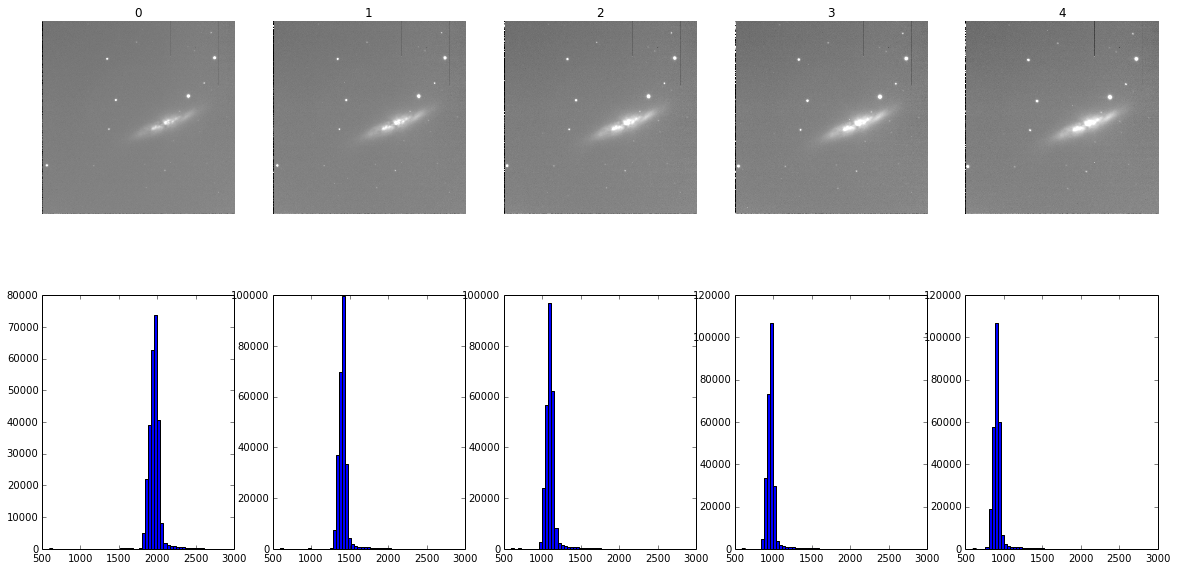

In [9]:
plt.figure(figsize=(20,10))
for i,f in enumerate(imageArrayR):
    data = f
    med = np.nanmedian(data.flatten())
    plt.subplot(2,5,i+1)
    plt.imshow(data, origin="lowerleft",norm=LogNorm(), cmap="gray")
    plt.axis('off')
    plt.clim(med*0.5,med*2)
    plt.title(i)
    plt.subplot(2,5,6+i)
    plt.hist(data.flatten(),range=(600,2600),bins=50);

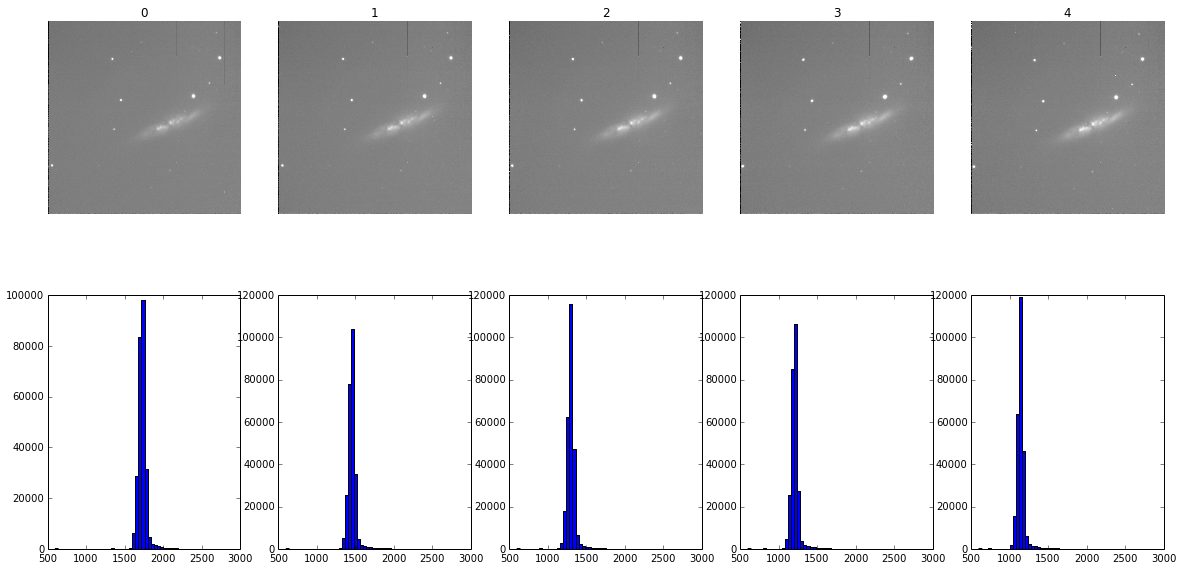

In [10]:
plt.figure(figsize=(20,10))
for i,f in enumerate(imageArrayG):
    data = f
    med = np.nanmedian(data.flatten())
    plt.subplot(2,5,i+1)
    plt.imshow(data, origin="lowerleft",norm=LogNorm(), cmap="gray")
    plt.axis('off')
    plt.clim(med*0.5,med*2)
    plt.title(i)
    plt.subplot(2,5,6+i)
    plt.hist(data.flatten(),range=(600,2600),bins=50);


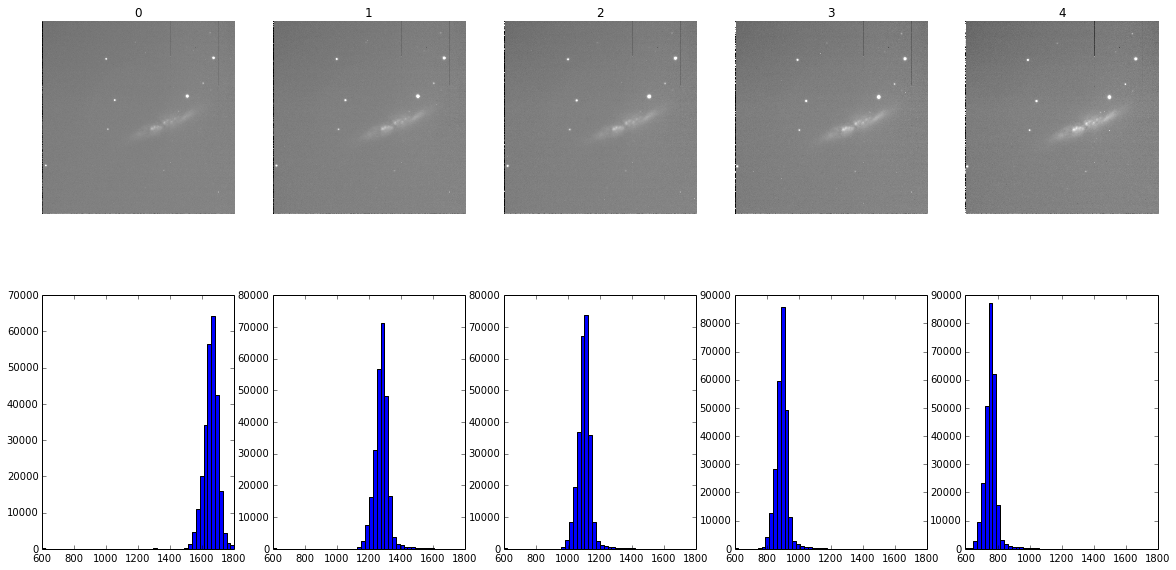

In [11]:
plt.figure(figsize=(20,10))
for i,f in enumerate(imageArrayB):
    data = f
    med = np.nanmedian(data.flatten())
    plt.subplot(2,5,i+1)
    plt.imshow(data, origin="lowerleft",norm=LogNorm(), cmap="gray")
    plt.axis('off')
    plt.clim(med*0.5,med*2)
    plt.title(i)
    plt.subplot(2,5,6+i)
    plt.hist(data.flatten(),range=(600,1800),bins=50);


## try to subtract the sky background
subtract the median so that all the images have roughly the same sky background as the last image in the sequence.

In [14]:
def subtract_sky(imageArray):
    im0 = imageArray[-1];
    imageArray_sub = np.array([im - np.median(im-im0) for im in imageArray])
    return imageArray_sub

In [15]:
imageArrayR_sub = subtract_sky(imageArrayR)
imageArrayG_sub = subtract_sky(imageArrayG)
imageArrayB_sub = subtract_sky(imageArrayB)

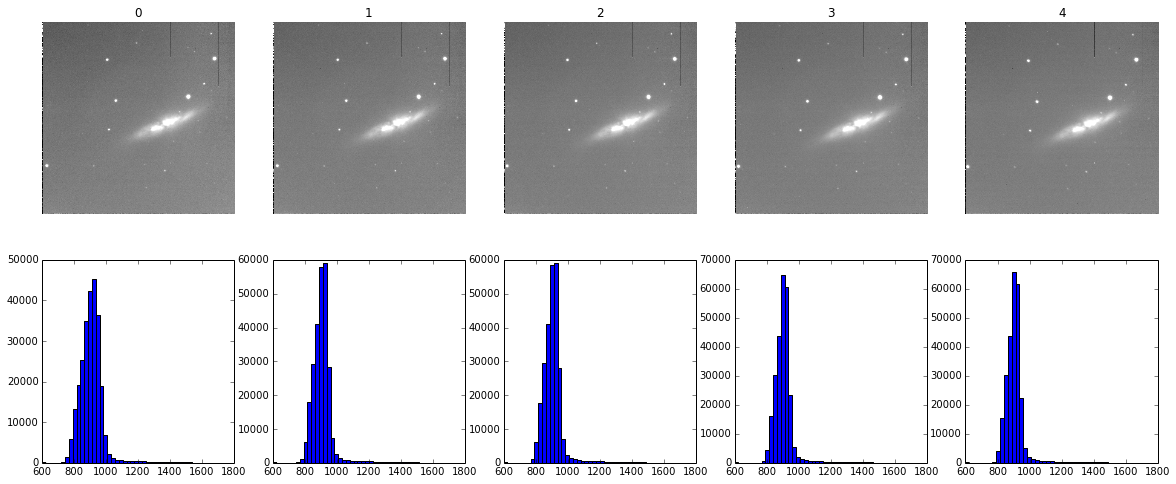

In [50]:
plt.figure(figsize=(20,8))
for i,f in enumerate(imageArrayR_sub):
    data = f
    plt.subplot(2,5,i+1)
    plt.imshow(data, origin="lowerleft",norm=LogNorm(), cmap="gray")
    plt.axis('off')
    plt.clim(500,1700)
    plt.title(i)
    plt.subplot(2,5,6+i)
    plt.hist(data.flatten(),range=(600,1800),bins=50);

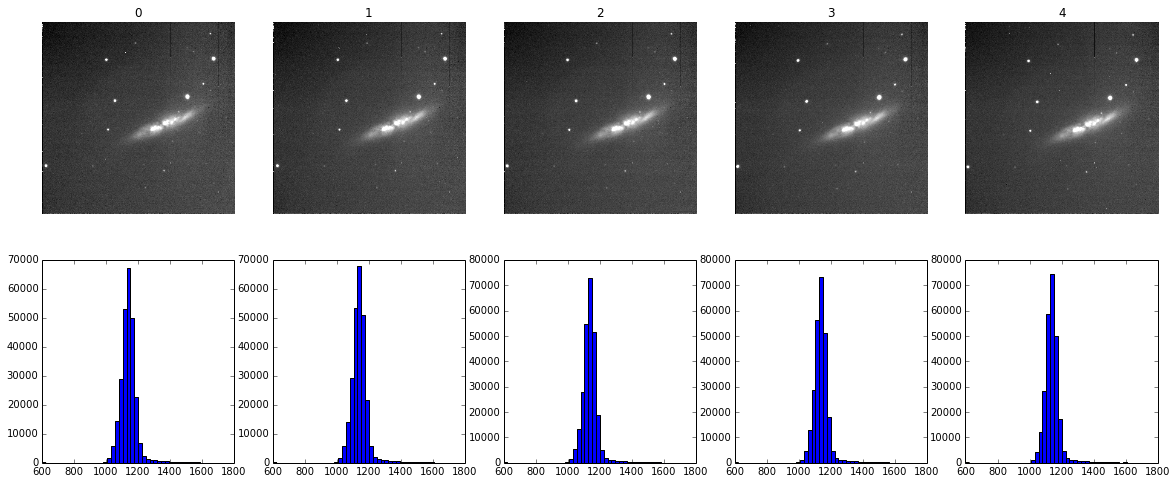

In [53]:
plt.figure(figsize=(20,8))
for i,f in enumerate(imageArrayG_sub):
    data = f
    plt.subplot(2,5,i+1)
    plt.imshow(data, origin="lowerleft",norm=LogNorm(), cmap="gray")
    plt.axis('off')
    plt.clim(1000,1700)
    plt.title(i)
    plt.subplot(2,5,6+i)
    plt.hist(data.flatten(),range=(600,1800),bins=50);

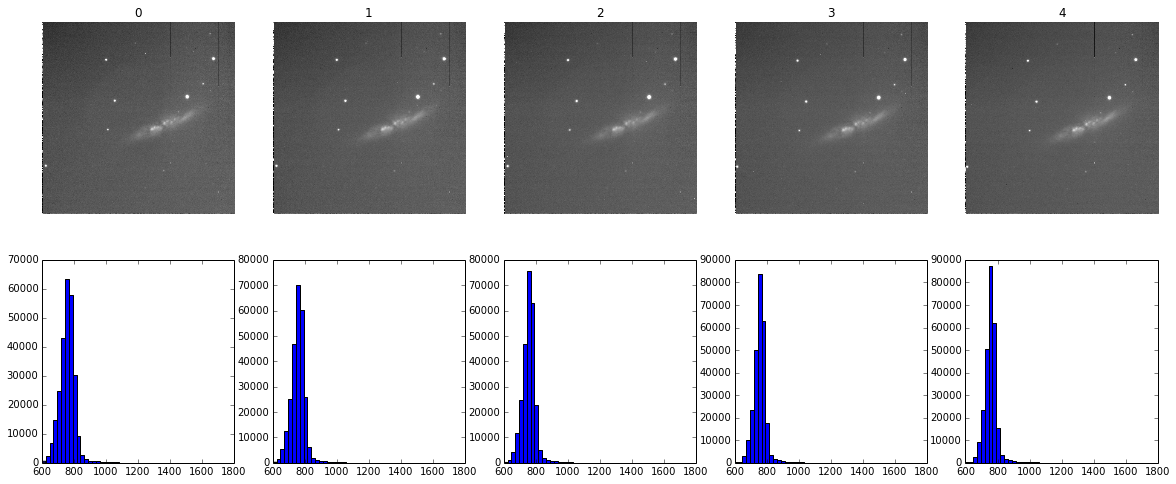

In [54]:
plt.figure(figsize=(20,8))
for i,f in enumerate(imageArrayB_sub):
    data = f
    plt.subplot(2,5,i+1)
    plt.imshow(data, origin="lowerleft",norm=LogNorm(), cmap="gray")
    plt.axis('off')
    plt.clim(500,1700)
    plt.title(i)
    plt.subplot(2,5,6+i)
    plt.hist(data.flatten(),range=(600,1800),bins=50);

save the background reduced images to fit files

In [36]:
imageList = glob.glob('/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/R/Processed_M82_P-00*')
outdir = '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/R/'
for i,imageName in enumerate(imageList):
    oldData = pyfits.open(imageName)[0]
    name = imageName.split("/")[-1]
    sciencehdu = pyfits.PrimaryHDU(imageArrayR_sub[i], header=oldData.header)
    sciencehdu.writeto(outdir+'median_subtracted_'+name, clobber=True)
    del sciencehdu
    

Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/R/median_subtracted_Processed_M82_P-001R.fit'.
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/R/median_subtracted_Processed_M82_P-002R.fit'.
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/R/median_subtracted_Processed_M82_P-003R.fit'.
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/R/median_subtracted_Processed_M82_P-004R.fit'.
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/R/median_subtracted_Processed_M82_P-005R.fit'.


In [37]:
imageList = glob.glob('/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/G/Processed_M82_P-00*')
outdir = '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/G/'
for i,imageName in enumerate(imageList):
    oldData = pyfits.open(imageName)[0]
    name = imageName.split("/")[-1]
    sciencehdu = pyfits.PrimaryHDU(imageArrayG_sub[i], header=oldData.header)
    sciencehdu.writeto(outdir+'median_subtracted_'+name, clobber=True)
    del sciencehdu

Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/G/median_subtracted_Processed_M82_P-001G.fit'.
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/G/median_subtracted_Processed_M82_P-002G.fit'.
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/G/median_subtracted_Processed_M82_P-003G.fit'.
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/G/median_subtracted_Processed_M82_P-004G.fit'.
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/G/median_subtracted_Processed_M82_P-005G.fit'.


In [38]:
imageList = glob.glob('/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/B/Processed_M82_P-00*')
outdir = '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/B/'
for i,imageName in enumerate(imageList):
    oldData = pyfits.open(imageName)[0]
    name = imageName.split("/")[-1]
    sciencehdu = pyfits.PrimaryHDU(imageArrayB_sub[i], header=oldData.header)
    sciencehdu.writeto(outdir+'median_subtracted_'+name, clobber=True)
    del sciencehdu

Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/B/median_subtracted_Processed_M82_P-001B.fit'.
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/B/median_subtracted_Processed_M82_P-002B.fit'.
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/B/median_subtracted_Processed_M82_P-003B.fit'.
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/B/median_subtracted_Processed_M82_P-004B.fit'.
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/B/median_subtracted_Processed_M82_P-005B.fit'.


In [60]:
12*60/500.

1.44

# Coadd the images

In [53]:
def batchRun(filterName, referenceCat=False):
    processedImage=[file for file in glob.glob(datadir+"{0}/*".format(filterName)) if "median" in file]
    print len(processedImage)
    coaddDir=datadir+"{0}/coadd/".format(filterName)
    RefDir=datadir+"reference.cat"
    coaddition.setupWorkdir(processedImage,coaddDir)
    coaddition.detectStars(coaddDir)
    coaddition.measureSeeing(coaddDir, showseeingplots=True)
    if referenceCat:
        coaddition.createRefCatalog(coaddDir, outputcatpath = RefDir,
                           handpickedcat = None,
                           minfwhm = 1, maxfwhm =
                           8.5, maxell = 1.25)
        chto_coadd.visualizeAlignmentStars(coaddDir)
    coaddition.matchAlignmentStars(coaddDir, refcat =RefDir , tolerance = 5.0,
                        minnbrstars = 4, maxdist = 50)
    coaddition.createTransforms(coaddDir)
    coaddition.transformImages(coaddDir)
    coaddition.transformMasks(coaddDir, maskext='.mask')
    chto_coadd.coaddImages(coaddDir, coaddfile = None, method='median')


5
I have found 5 images to align.
Database written. See you !
Reading database...
I will now start to run sextractor on these 5 images.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
1 / 5 : median_subtracted_Processed_M82_P-001B.fit
median_subtracted_Processed_M82_P-001B.cat
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
2 / 5 : median_subtracted_Processed_M82_P-002B.fit
median_subtracted_Processed_M82_P-002B.cat
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
3 / 5 : median_subtracted_Processed_M82_P-003B.fit
median_subtracted_Processed_M82_P-003B.cat
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
4 / 5 : median_subtracted_Processed_M82_P-004B.fit
median_subtracted_Processed_M82_P-004B.cat
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
5 / 5 : median_subtracted_Processed_M82_P-005B.fit
median_subtracted_Processed_M82_

Scale : 1.000544
Angle : 359.98865
RMS   : 0.0811699127812
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
4 / 5 : median_subtracted_Processed_M82_P-004B.fit
Scale : 1.000454
Angle : 0.00465
RMS   : 0.0876705338494
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
5 / 5 : median_subtracted_Processed_M82_P-005B.fit
Scale : 1.000236
Angle : 0.01119
RMS   : 0.072379567021
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
IRAF geomap done in 0:00:00.

Summary :
 -   geomap RMS
 -   geomap angle [deg]
 -   geomap scale
 -   number of alignment stars.

|    0.000 |    0.000 |    1.000 |   9 | median_subtracted_Processed_M82_P-001B.fit 
|    0.086 |    0.004 |    1.000 |   8 | median_subtracted_Processed_M82_P-002B.fit 
|    0.081 |  359.989 |    1.001 |   7 | median_subtracted_Processed_M82_P-003B.fit 
|    0.088 |    0.005 |    1.000 |   8 | median_subtracted_Processed_M82_P-004B.fit 
|    0.072 |

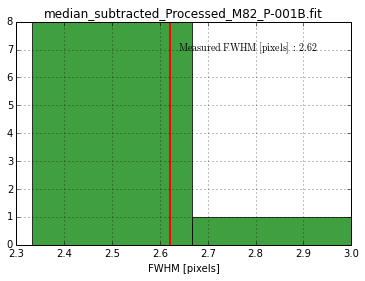

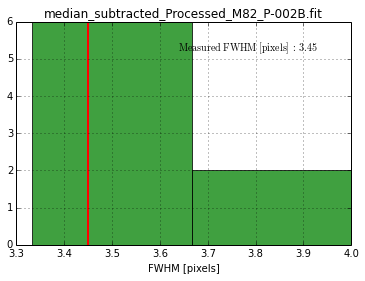

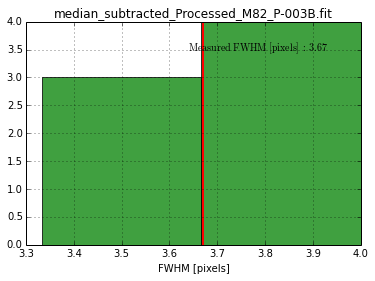

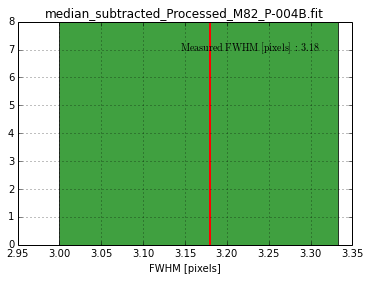

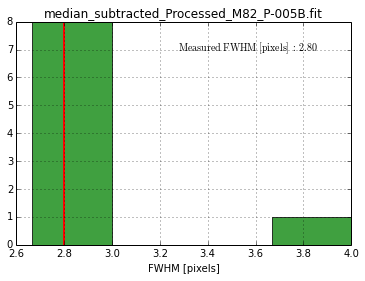

In [55]:
datadir = '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/'
batchRun('B',referenceCat=True)

5
I have found 5 images to align.
Your workdir already exists. 
(workdir = /afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/G/coadd/)
Should I delete it?y
Ok, starting from scratch.
Database written. See you !
Reading database...
I will now start to run sextractor on these 5 images.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
1 / 5 : median_subtracted_Processed_M82_P-001G.fit
median_subtracted_Processed_M82_P-001G.cat
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
2 / 5 : median_subtracted_Processed_M82_P-002G.fit
median_subtracted_Processed_M82_P-002G.cat
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
3 / 5 : median_subtracted_Processed_M82_P-003G.fit
median_subtracted_Processed_M82_P-003G.cat
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
4 / 5 : median_subtracted_Processed_M82_P-004G.fit
median_subtracted_Processed_M82_P-004G.cat
- - 

Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/G/coadd/median_subtracted_Processed_M82_P-001G_ali.fits'.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
2 / 5 : median_subtracted_Processed_M82_P-002G.fit
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/G/coadd/median_subtracted_Processed_M82_P-002G_ali.fits'.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
3 / 5 : median_subtracted_Processed_M82_P-003G.fit
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/G/coadd/median_subtracted_Processed_M82_P-003G_ali.fits'.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
4 / 5 : median_subtracted_Processed_M82_P-004G.fit
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/G/coadd/median_subtracted_Processed_M82_P-004G_ali.fits'.
- - - - - - - - - - - - - - 

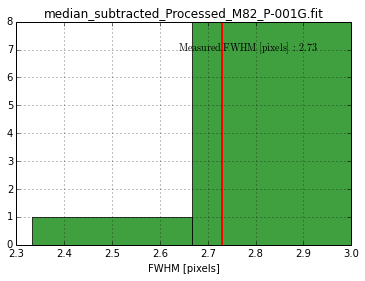

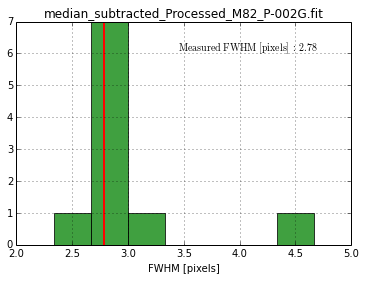

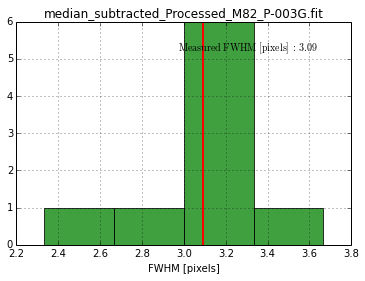

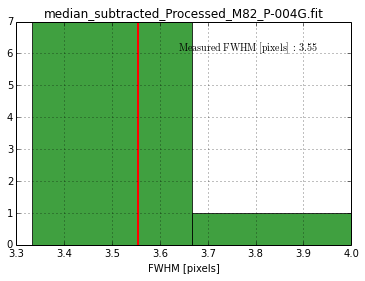

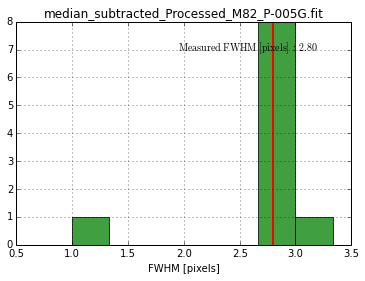

In [54]:
datadir = '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/'
batchRun('G',referenceCat=True)

I have found 5 images to align.
Your workdir already exists. 
(workdir = /afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/R/coadd/)
Should I delete it?y
Ok, starting from scratch.
Database written. See you !
Reading database...
I will now start to run sextractor on these 5 images.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
1 / 5 : median_subtracted_Processed_M82_P-001R.fit
median_subtracted_Processed_M82_P-001R.cat
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
2 / 5 : median_subtracted_Processed_M82_P-002R.fit
median_subtracted_Processed_M82_P-002R.cat
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
3 / 5 : median_subtracted_Processed_M82_P-003R.fit
median_subtracted_Processed_M82_P-003R.cat
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
4 / 5 : median_subtracted_Processed_M82_P-004R.fit
median_subtracted_Processed_M82_P-004R.cat
- - - 

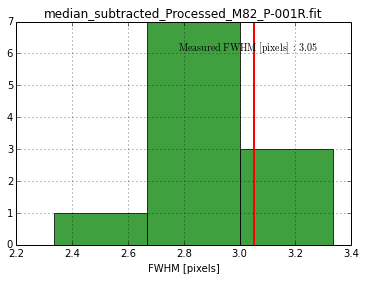

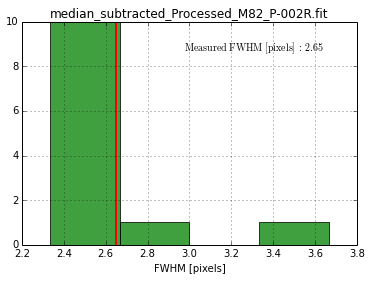

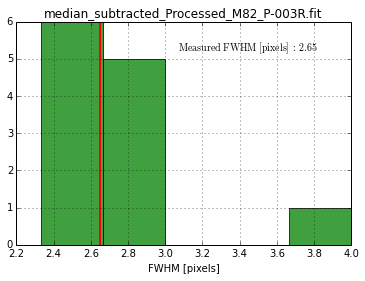

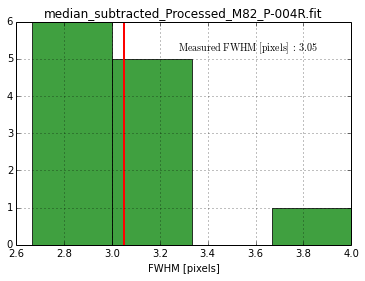

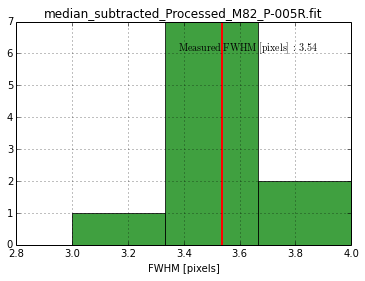

In [44]:
filterName = 'R'
processedImage = glob.glob('/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/{0}/median*'.format(filterName))
datadir = '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/'
coaddDir = datadir + "{0}/coadd/".format(filterName)
#if not os.path.exists(coaddDir):
#    os.mkdir(coaddDir)
RefDir=datadir+"reference.cat"
coaddition.setupWorkdir(processedImage,coaddDir)
coaddition.detectStars(coaddDir)
coaddition.measureSeeing(coaddDir, showseeingplots=True)

In [45]:
coaddition.createRefCatalog(coaddDir, outputcatpath = RefDir,
                   handpickedcat = None,
                   minfwhm = 1, maxfwhm =
                   8.5, maxell = 1.25)
chto_coadd.visualizeAlignmentStars(coaddDir)
coaddition.matchAlignmentStars(coaddDir, refcat =RefDir , tolerance = 5.0,
                        minnbrstars = 4, maxdist = 50)
coaddition.createTransforms(coaddDir)
coaddition.transformImages(coaddDir)
coaddition.transformMasks(coaddDir, maskext='.mask')
chto_coadd.coaddImages(coaddDir, coaddfile = None, method='median')

Reading database...
Ok, we have 5 images.
Automatic reference image selection
Reference image catalog : median_subtracted_Processed_M82_P-004R.cat
So you want me to select alignment stars. Fine, let's see what we can do.
Number of sources in catalog : 18
I've read 12 usable stars from median_subtracted_Processed_M82_P-004R.cat
Parameters minfwhm = 1.000000, maxfwhm = 8.500000, maxell = 1.250000
I've selected the 12 brightest stars among 12 available good stars.
         8 : (  385.23,  309.91) |    592052.00 |  2.99  0.02
         5 : (  454.94,  410.89) |    362029.00 |  3.08  0.01
         9 : (  192.78,  299.51) |     70912.70 |  2.96  0.02
         6 : (  169.87,  408.13) |     66635.30 |  2.98  0.03
        12 : (  174.47,  222.70) |     23633.60 |  2.98  0.02
         7 : (  427.24,  344.19) |     20217.50 |  3.05  0.03
        10 : (  445.68,  477.22) |      9417.80 |  3.14  0.07
        16 : (  322.88,  113.68) |      7615.96 |  3.25  0.04
        13 : (  410.92,  246.30) |    

Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/R/coadd/median_subtracted_Processed_M82_P-001R_ali.fits'.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
2 / 5 : median_subtracted_Processed_M82_P-002R.fit
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/R/coadd/median_subtracted_Processed_M82_P-002R_ali.fits'.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
3 / 5 : median_subtracted_Processed_M82_P-003R.fit
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/R/coadd/median_subtracted_Processed_M82_P-003R_ali.fits'.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
4 / 5 : median_subtracted_Processed_M82_P-004R.fit
Overwrite existing file '/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/R/coadd/median_subtracted_Processed_M82_P-004R_ali.fits'.
- - - - - - - - - - - - - - 

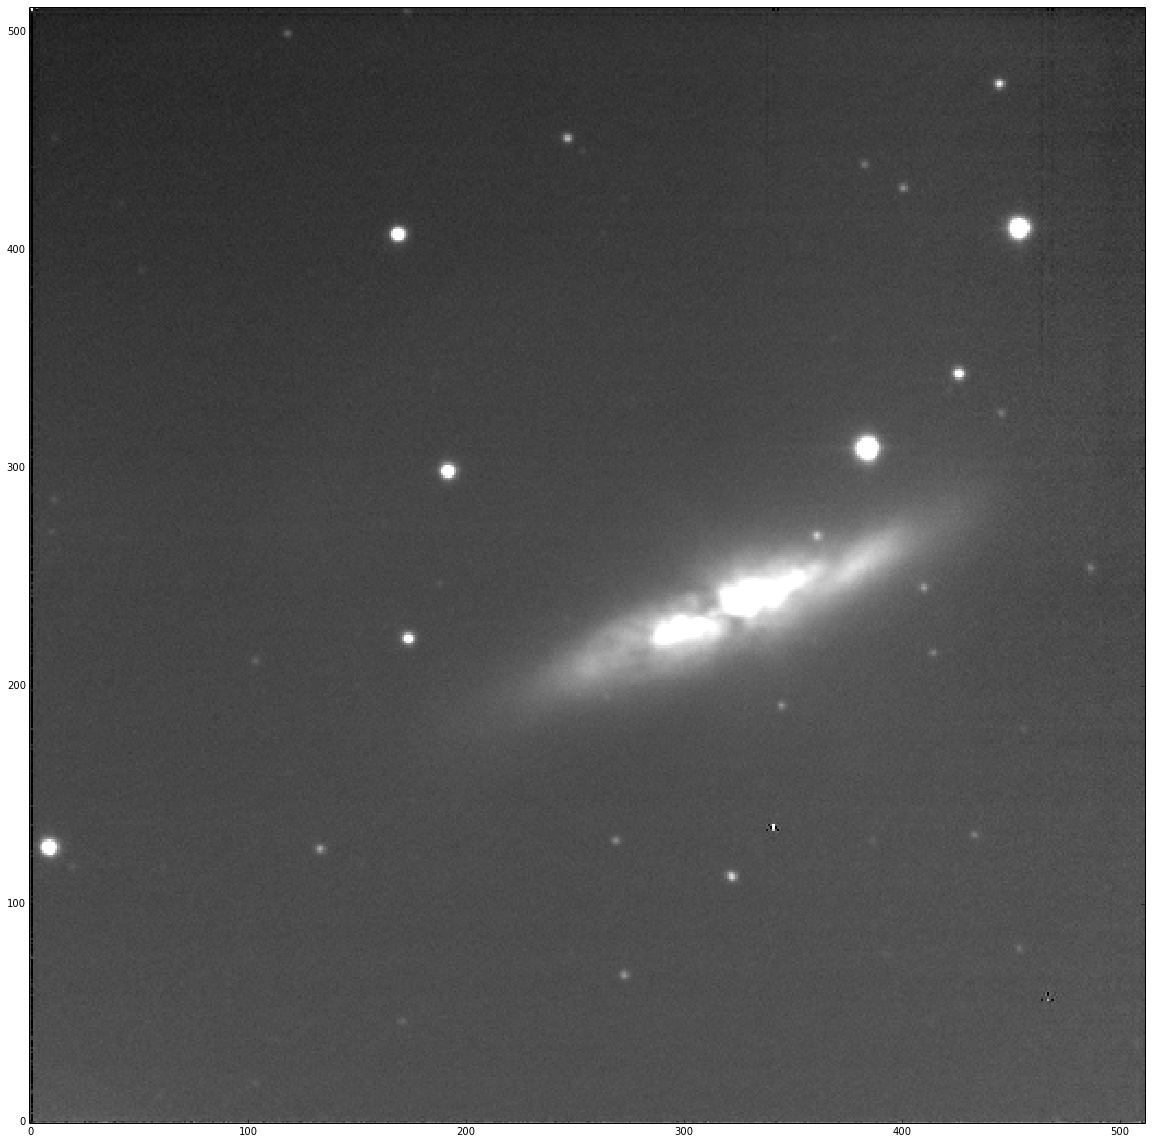

In [4]:
temp = pyfits.open('/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/R/coadd/coadd.fits')[0].data
plt.figure(figsize=(20,20))
plt.imshow(temp, origin="lowerleft",norm=LogNorm(), cmap="gray",interpolation='none')
plt.clim(700,1700)

In [61]:
3.6e6*1/3600/180*np.pi

17.453292519943293